In [17]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import math
import kagglehub
from kagglehub import KaggleDatasetAdapter

import os
import shutil

import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Download the dataset and get the path to the cached files
path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\demat\.cache\kagglehub\datasets\camnugent\california-housing-prices\versions\1


In [18]:
dest = os.getcwd()

# Copy all files from cache path into your current folder
for file_name in os.listdir(path):
    full_file_name = os.path.join(path, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, dest)


In [20]:
df = pd.read_csv(file_name)

In [21]:
print("First 5 records:", df.head())


First 5 records:    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


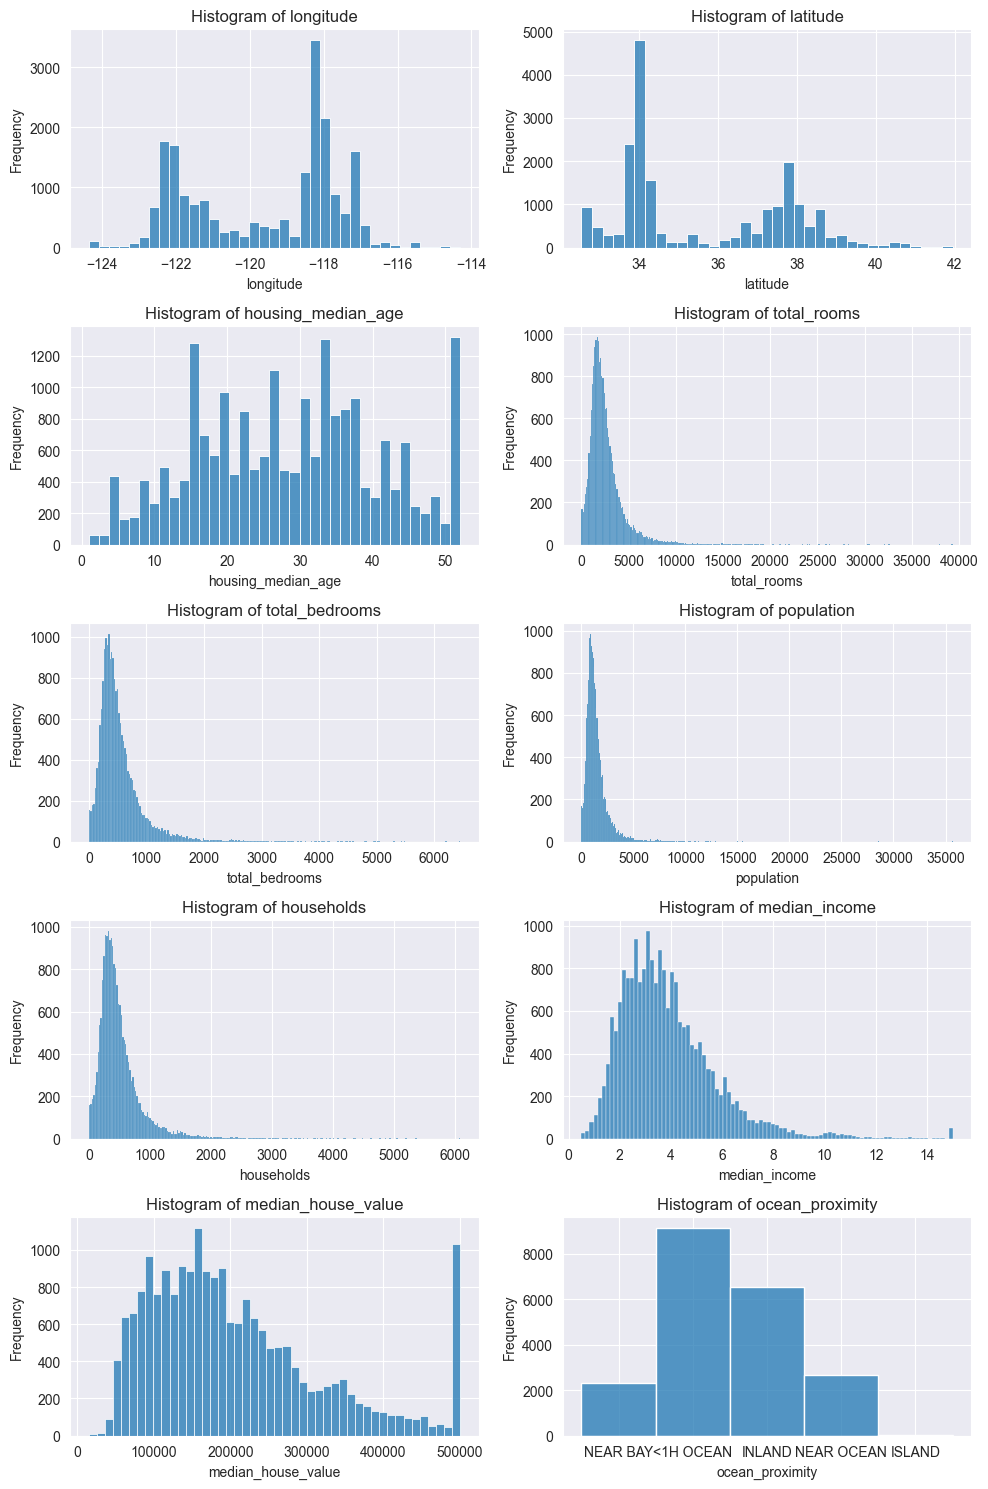

In [77]:
# features_list = ['housing_median_age', 'total_rooms',
#     'total_bedrooms', 'population', 'households', 'median_income',
#     'median_house_value']

fig, ax = plt.subplots(5, 2, figsize=(10, 15))

for i, column in enumerate(df.columns):
    sns.histplot(df[column], ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title(f'Histogram of {column}')
    ax[i//2, i%2].set_xlabel(column)
    ax[i//2, i%2].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

In [57]:
def norm_and_visualize(column_name):
    modifications = [
        ("Original", df[column_name].dropna()),
        ("Log", np.log1p(df[column_name].dropna())),
        ("Sqrt", np.sqrt(df[column_name].dropna())),
        ("Cbrt", np.cbrt(df[column_name].dropna())),
    ]

    fig, axs = plt.subplots(len(modifications), 2, figsize=(12, 10))

    for i, (label, data) in enumerate(modifications):
        # Histogram
        axs[i][0].hist(data, bins=50, edgecolor='black')
        axs[i][0].set_title(f'Histogram of {column_name} ({label})')
        axs[i][0].set_xlabel(column_name)
        axs[i][0].set_ylabel('Frequency')

        mu = np.mean(data)
        sigma = np.std(data)

        x = np.linspace(min(data), max(data), 100)
        y = stats.norm.pdf(x, mu, sigma)

        count, bins = np.histogram(data, bins=50)
        y_scaled = y * len(data) * (bins[1] - bins[0])

        axs[i][0].plot(x, y_scaled, 'r-', lw=4)

        # Q-Q plot
        stats.probplot(data, plot=axs[i][1])
        axs[i][1].set_title(f'Q-Q plot of {column_name} ({label})')

        # KS test
        ks_result = stats.kstest(data, 'norm')
        print(f"{label} KS test:", ks_result)

    plt.tight_layout()
    plt.show()

Original KS test: KstestResult(statistic=np.float64(0.8953266796146241), pvalue=np.float64(0.0), statistic_location=np.float64(1.5809), statistic_sign=np.int8(-1))
Log KS test: KstestResult(statistic=np.float64(0.7813581122796576), pvalue=np.float64(0.0), statistic_location=np.float64(0.9007709202161183), statistic_sign=np.int8(-1))
Sqrt KS test: KstestResult(statistic=np.float64(0.8523992200495464), pvalue=np.float64(0.0), statistic_location=np.float64(1.1782189949241186), statistic_sign=np.int8(-1))
Cbrt KS test: KstestResult(statistic=np.float64(0.8404538546318661), pvalue=np.float64(0.0), statistic_location=np.float64(1.091392883061106), statistic_sign=np.int8(-1))


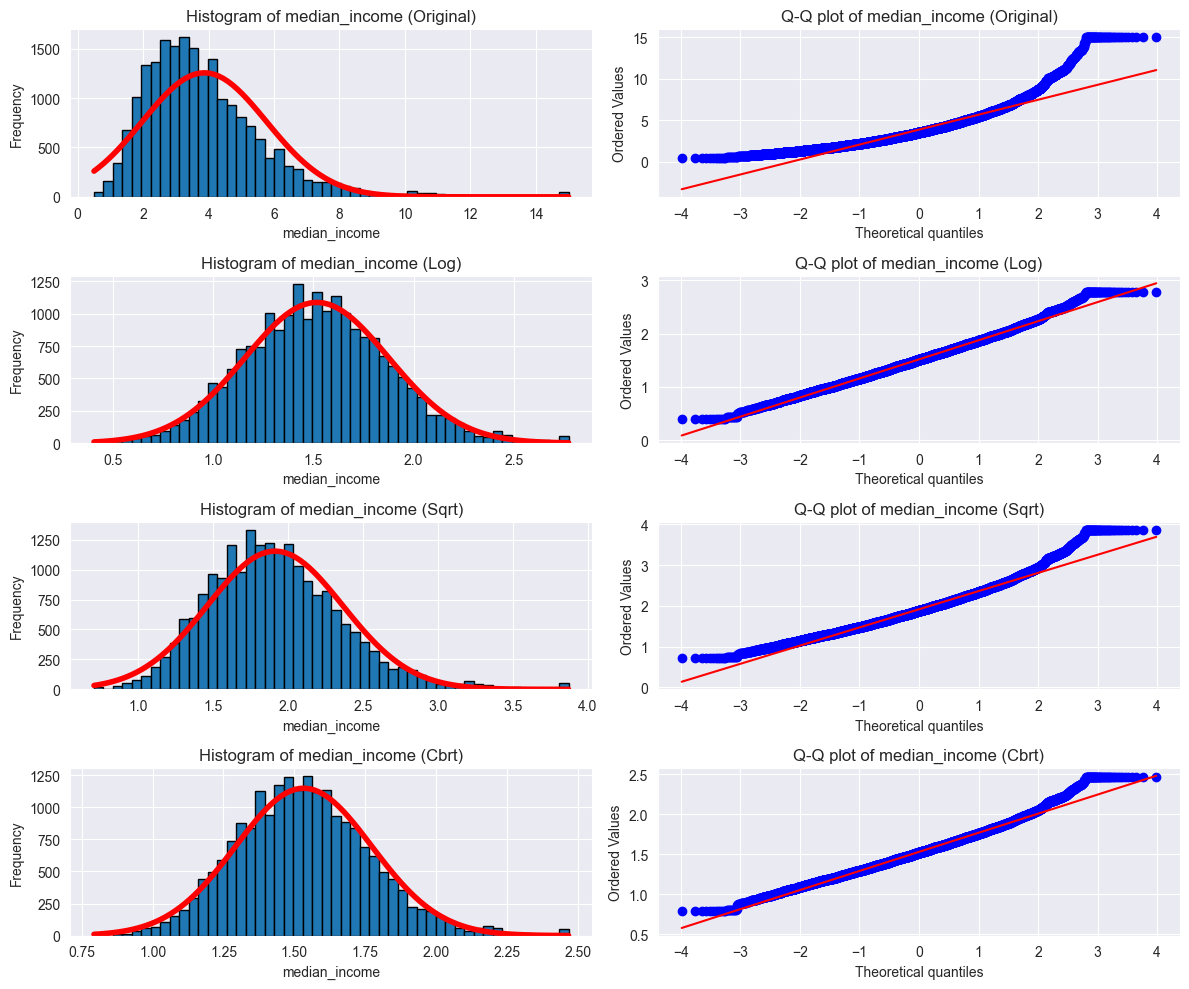

In [58]:
norm_and_visualize('median_income')

Original KS test: KstestResult(statistic=np.float64(0.9999515494010092), pvalue=np.float64(0.0), statistic_location=np.float64(6.0), statistic_sign=np.int8(-1))
Log KS test: KstestResult(statistic=np.float64(0.9984429239416888), pvalue=np.float64(0.0), statistic_location=np.float64(3.4339872044851463), statistic_sign=np.int8(-1))
Sqrt KS test: KstestResult(statistic=np.float64(0.9997039963496198), pvalue=np.float64(0.0), statistic_location=np.float64(3.872983346207417), statistic_sign=np.int8(-1))
Cbrt KS test: KstestResult(statistic=np.float64(0.9979210479308029), pvalue=np.float64(0.0), statistic_location=np.float64(3.3019272488946267), statistic_sign=np.int8(-1))


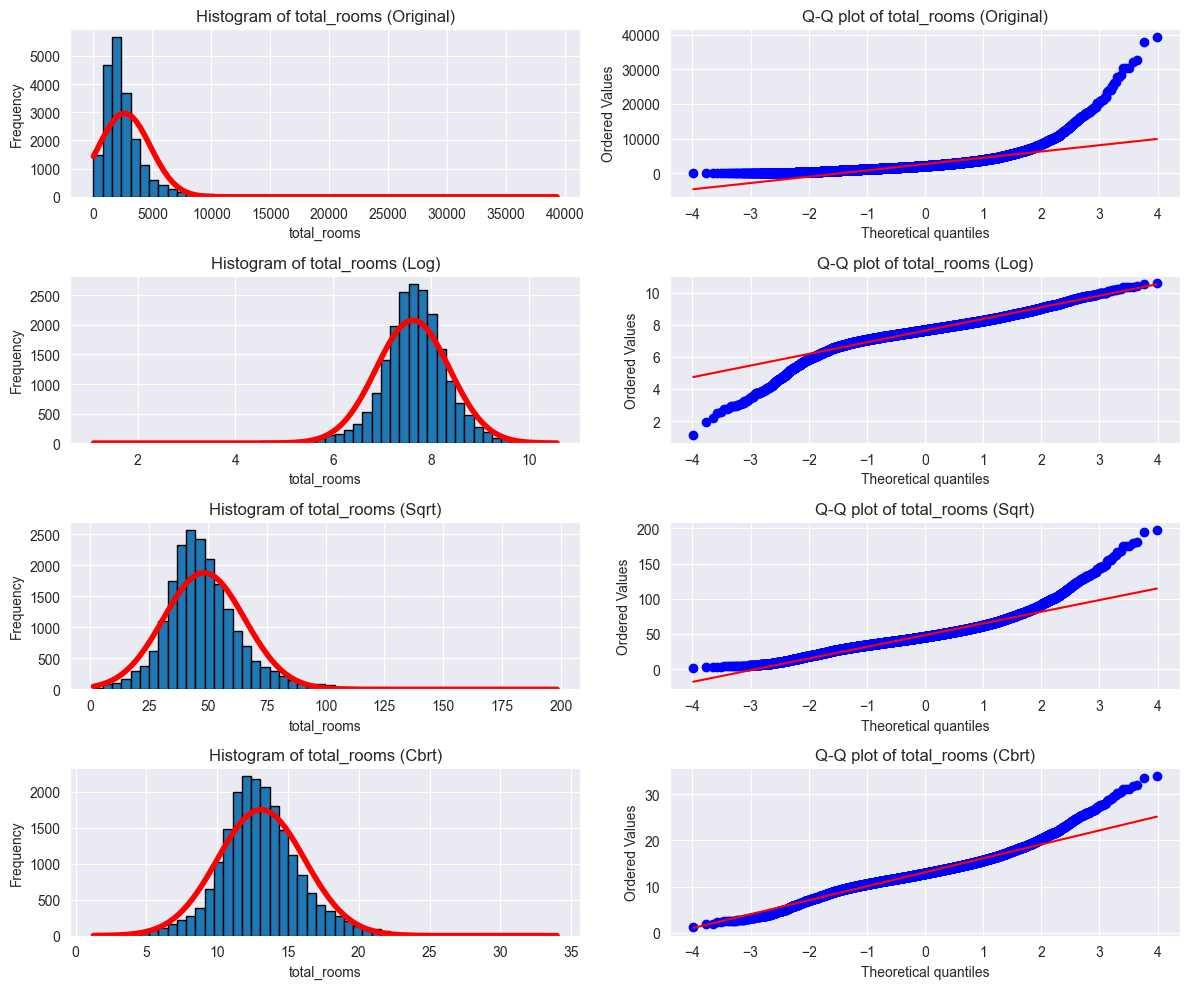

In [59]:
norm_and_visualize('total_rooms')

Original KS test: KstestResult(statistic=np.float64(1.0), pvalue=np.float64(0.0), statistic_location=np.float64(14999.0), statistic_sign=np.int8(-1))
Log KS test: KstestResult(statistic=np.float64(1.0), pvalue=np.float64(0.0), statistic_location=np.float64(9.615805480084347), statistic_sign=np.int8(-1))
Sqrt KS test: KstestResult(statistic=np.float64(1.0), pvalue=np.float64(0.0), statistic_location=np.float64(122.47040458821061), statistic_sign=np.int8(-1))
Cbrt KS test: KstestResult(statistic=np.float64(1.0), pvalue=np.float64(0.0), statistic_location=np.float64(24.661572683997797), statistic_sign=np.int8(-1))


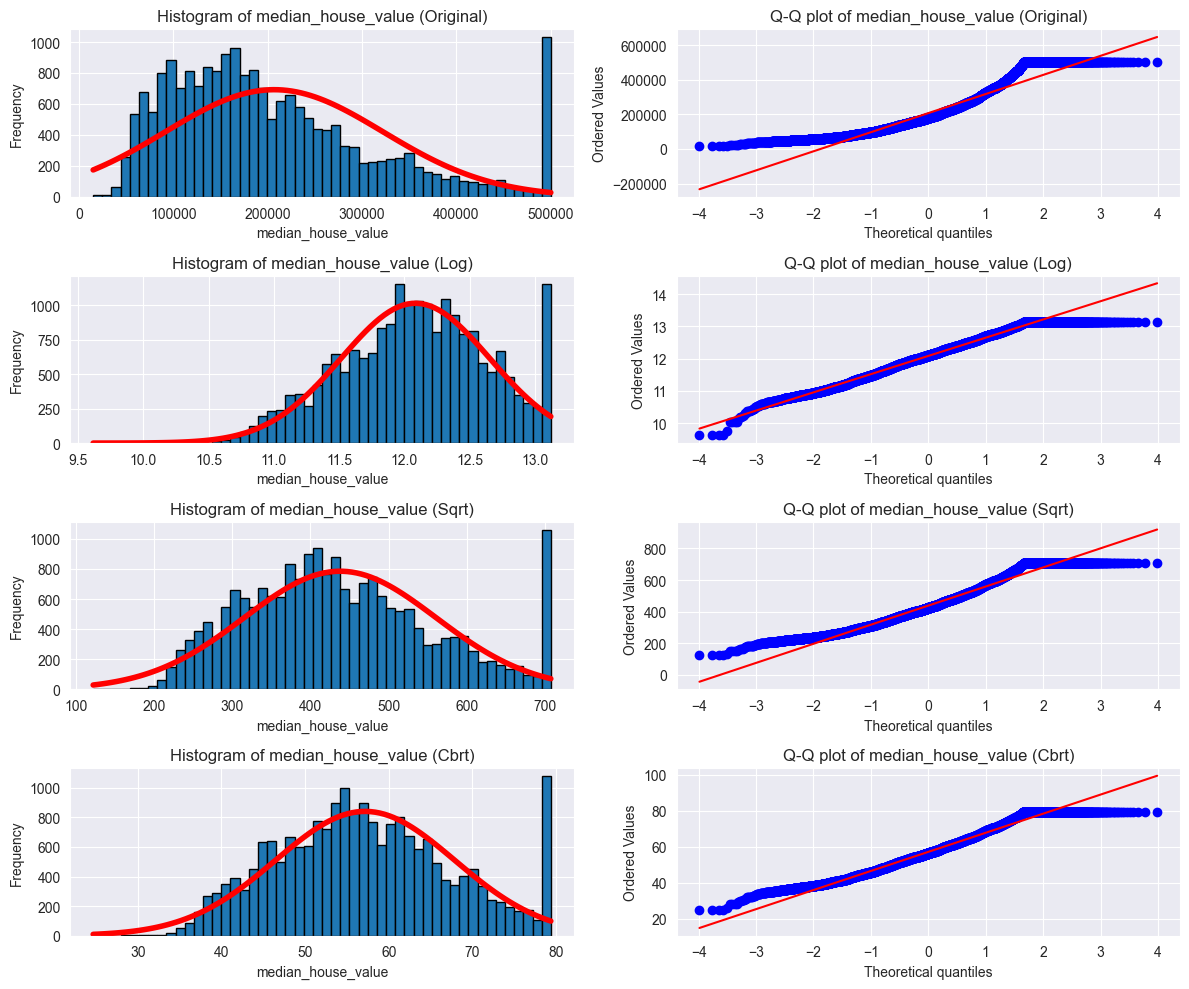

In [60]:
norm_and_visualize('median_house_value')